# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
import gmaps
import json
import requests
from api_keys import api_key
from api_keys import g_key
import random
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Access maps with unique API key
gmaps.configure(api_key=g_key)

## Generate Cities List

In [48]:
# Import cities file as DataFrame
#cities_pd = pd.read_csv("worldcities.csv")
cities_pd = pd.read_csv("Resources/cities.csv")

cities_pd.head(100)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,jacareacanga,0,BR,1528902000,62,-6.22,-57.76,89.60,6.93
1,1,kaitangata,100,NZ,1528905304,94,-46.28,169.85,42.61,5.64
2,2,goulburn,20,AU,1528905078,91,-34.75,149.72,44.32,10.11
3,3,lata,76,IN,1528905305,89,30.78,78.62,59.89,0.94
4,4,chokurdakh,0,RU,1528905306,88,70.62,147.90,32.17,2.95
...,...,...,...,...,...,...,...,...,...,...
95,95,tahe,92,CN,1528905359,98,52.34,124.71,51.43,2.17
96,96,chuy,80,UY,1528905099,93,-33.69,-53.46,52.87,28.90
97,97,dzerzhinskoye,8,RU,1528905360,69,56.84,95.22,65.11,3.85
98,98,vanavara,0,RU,1528905360,50,60.35,102.28,64.21,5.64


In [49]:
cities_pd.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>City_ID</th>\n      <th>City</th>\n      <th>Cloudiness</th>\n      <th>Country</th>\n      <th>Date</th>\n      <th>Humidity</th>\n      <th>Lat</th>\n      <th>Lng</th>\n      <th>Max Temp</th>\n      <th>Wind Speed</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>0</td>\n      <td>jacareacanga</td>\n      <td>0</td>\n      <td>BR</td>\n      <td>1528902000</td>\n      <td>62</td>\n      <td>-6.22</td>\n      <td>-57.76</td>\n      <td>89.60</td>\n      <td>6.93</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>1</td>\n      <td>kaitangata</td>\n      <td>100</td>\n      <td>NZ</td>\n      <td>1528905304</td>\n      <td>94</td>\n      <td>-46.28</td>\n      <td>169.85</td>\n      <td>42.61</td>\n      <td>5.64</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2</td>\n      <td>goulburn</td>\n      <td>20</td>\n      <td>AU</td>\n    

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [50]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#cities = cities_pd["city_ascii"]
#api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={your api key}
cities = cities_pd["City"]
cntry = cities_pd["Country"]

lat = cities_pd["Lat"]
lng = cities_pd["Lng"]

temper = cities_pd["Max Temp"]
hum = cities_pd["Humidity"]
cloud = cities_pd["Cloudiness"]
speed = cities_pd["Wind Speed"]



nor_lat = []
nor_hum = []
nor_temper = []
nor_cloud = []
nor_speed = []

sou_lat = []
sou_hum = []
sou_temper = []
sou_cloud = []
sou_speed = []

units = "metric"
impl = "imperial"
query_url = f"{url}appid={api_key}&units={impl}&q="



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [51]:
#  Get the indices of cities that have humidity over 100%.

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#by default all humidity are less than 100
for index, row in cities_pd.iterrows():
    try:
        if (row["Lat"] >= 0 ):
            nor_lat.append(row['Lat'])
            nor_temper.append(row['Max Temp'])
            nor_hum.append(row['Humidity'])
            nor_speed.append(row['Wind Speed'])
            nor_cloud.append(row['Cloudiness'])            
        else:
            sou_lat.append(row['Lat'])
            sou_temper.append(row['Max Temp'])
            sou_hum.append(row['Humidity'])
            sou_speed.append(row['Wind Speed'])
            sou_cloud.append(row['Cloudiness'])  
    except:
        pass
    

In [52]:
cities_pd.head(100)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,jacareacanga,0,BR,1528902000,62,-6.22,-57.76,89.60,6.93
1,1,kaitangata,100,NZ,1528905304,94,-46.28,169.85,42.61,5.64
2,2,goulburn,20,AU,1528905078,91,-34.75,149.72,44.32,10.11
3,3,lata,76,IN,1528905305,89,30.78,78.62,59.89,0.94
4,4,chokurdakh,0,RU,1528905306,88,70.62,147.90,32.17,2.95
...,...,...,...,...,...,...,...,...,...,...
95,95,tahe,92,CN,1528905359,98,52.34,124.71,51.43,2.17
96,96,chuy,80,UY,1528905099,93,-33.69,-53.46,52.87,28.90
97,97,dzerzhinskoye,8,RU,1528905360,69,56.84,95.22,65.11,3.85
98,98,vanavara,0,RU,1528905360,50,60.35,102.28,64.21,5.64


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [53]:
complete_wea_dict = {
    "lat": lat,
    "lng": lng,
    "temper": temper,
    "hum": hum,
    "cloud": cloud,
    "speed": speed
}
complete_wea_dict_data = pd.DataFrame(complete_wea_dict)
complete_wea_dict_data

,lat,lng,temper,hum,cloud,speed
0,-6.22,-57.76,89.60,62,0,6.93
1,-46.28,169.85,42.61,94,100,5.64
2,-34.75,149.72,44.32,91,20,10.11
3,30.78,78.62,59.89,89,76,0.94
4,70.62,147.90,32.17,88,0,2.95
...,...,...,...,...,...,...
542,39.82,15.79,70.06,100,36,5.30
543,13.32,122.68,83.47,100,68,22.64
544,0.61,-80.02,76.90,84,92,4.63
545,13.21,18.34,104.53,25,20,4.97


In [54]:
complete_nor_wea_dict = {
    "nor_lat": nor_lat,
    "nor_hum": nor_hum,
     "nor_temper": nor_temper,
    "nor_cloud": nor_cloud,
    "nor_speed": nor_speed
}
complete_nor_wea_dict_data = pd.DataFrame(complete_nor_wea_dict)
complete_nor_wea_dict_data    


,nor_lat,nor_hum,nor_temper,nor_cloud,nor_speed
0,30.78,89,59.89,76,0.94
1,70.62,88,32.17,0,2.95
2,56.40,94,55.03,92,9.33
3,62.63,44,60.80,0,13.87
4,50.23,58,53.60,75,19.46
...,...,...,...,...,...
379,44.18,41,67.27,88,14.81
380,39.82,100,70.06,36,5.30
381,13.32,100,83.47,68,22.64
382,0.61,84,76.90,92,4.63


In [55]:
complete_sou_wea_dict = {
    "sou_lat": sou_lat,
    "sou_hum": sou_hum,
    "sou_temper": sou_temper,
    "sou_cloud": sou_cloud,
    "sou_speed": sou_speed
}
complete_sou_wea_dict_data = pd.DataFrame(complete_sou_wea_dict)
complete_sou_wea_dict_data    


,sou_lat,sou_hum,sou_temper,sou_cloud,sou_speed
0,-6.22,62,89.60,0,6.93
1,-46.28,94,42.61,100,5.64
2,-34.75,91,44.32,20,10.11
3,-42.88,87,44.60,20,8.05
4,-31.97,88,44.50,0,7.31
...,...,...,...,...,...
158,-31.62,84,47.47,12,10.45
159,-12.89,37,74.56,0,4.07
160,-4.27,55,86.00,8,5.82
161,-2.76,52,91.40,40,8.05


In [56]:
#  Get the indices of cities that have humidity over 100%.
humd_over_more = complete_wea_dict_data.loc[complete_wea_dict_data["hum"] >100]
humd_over_more

,lat,lng,temper,hum,cloud,speed


In [57]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
complete_wea_dict_data

,lat,lng,temper,hum,cloud,speed
0,-6.22,-57.76,89.60,62,0,6.93
1,-46.28,169.85,42.61,94,100,5.64
2,-34.75,149.72,44.32,91,20,10.11
3,30.78,78.62,59.89,89,76,0.94
4,70.62,147.90,32.17,88,0,2.95
...,...,...,...,...,...,...
542,39.82,15.79,70.06,100,36,5.30
543,13.32,122.68,83.47,100,68,22.64
544,0.61,-80.02,76.90,84,92,4.63
545,13.21,18.34,104.53,25,20,4.97


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

C:\ravi\anaconda3\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


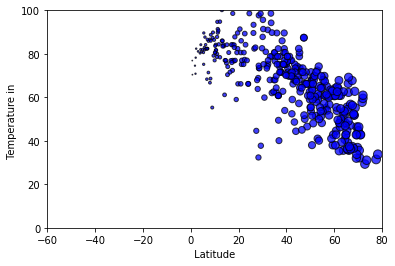

In [58]:
#This is for temperature vs latitude
x_limit = 100
x_axis = lat
data = temper
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(0, 100)
plt.xlim(-60,80)
plt.xlabel(" Latitude ")
plt.ylabel(" Temperature in  ")
plt.savefig("output_img/temp_vs_latitude.png")
plt.show()

## Latitude vs. Humidity Plot

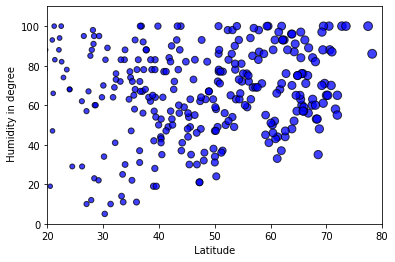

In [59]:
#This is for humidity vs latitude
x_limit = 100

x_axis = lat

data = hum
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(0, 110)
plt.xlim(20,80)
plt.xlabel(" Latitude ")
plt.ylabel(" Humidity in degree")
plt.savefig("output_img/humidity_vs_latitude.png")
plt.show()

## Latitude vs. Cloudiness Plot

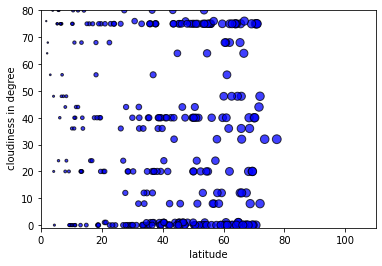

In [60]:
#This is for cloudiness vs latitude
x_limit = 100

x_axis = lat

data = cloud
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(-1, 80)
plt.xlim(0,110)
plt.xlabel(" latitude ")
plt.ylabel(" cloudiness in degree")
plt.savefig("output_img/cloudiness_vs_latitude.png")
plt.show()

## Latitude vs. Wind Speed Plot

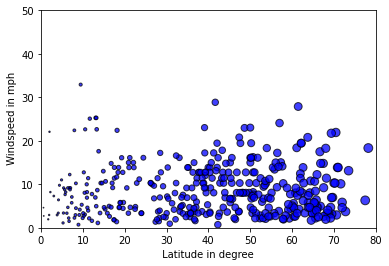

In [61]:
#This is for windspeed(mph) vs latitude
x_limit = 100

x_axis = lat

data = speed
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(0, 50)
plt.xlim(0,80)
plt.xlabel(" Latitude in degree ")
plt.ylabel(" Windspeed in mph")
plt.savefig("output_img/windspeed_vs_latitude.png")
plt.show()

## Linear Regression

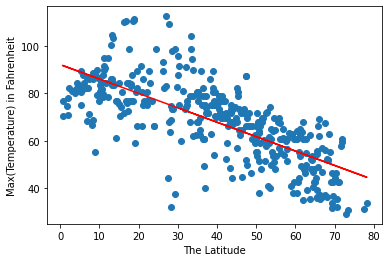

 The linear regression is y = -0.61x + 92.14


In [62]:
weather_dict = {
    "lat": nor_lat,
    "temp": nor_temper
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]




x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Temperature) in Fahrenheit')
plt.savefig("output_img/northern_max_temp_vs_latitude.png")
plt.show()
print(f' The linear regression is {line_eq}')


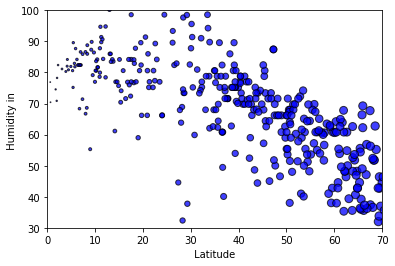

In [63]:
#This is for temperature vs latitude
x_limit = 100
x_axis = nor_lat
data = nor_temper
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(30, 100)
plt.xlim(0,70)
plt.xlabel(" Latitude ")
plt.ylabel(" Humidity in  ")
plt.savefig("output_img/northern_temp_vs_latitude.png")
plt.show()

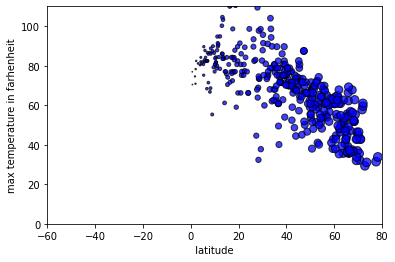

In [64]:
# max temperature vs latitude
x_limit = 100

x_axis = lat_data

data = max_temp
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(0, 110)
plt.xlim(-60,80)
plt.xlabel(" latitude ")
plt.ylabel("max temperature in farhenheit")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

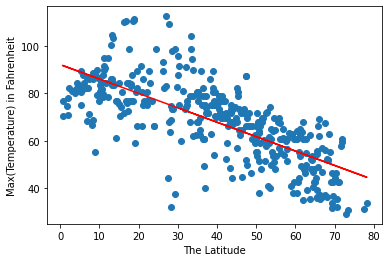

The r-squared is: 0.5317924060309513
 The linear regression is y = -0.61x + 92.14


In [65]:
#Max temperature vs Latitude, the linear regression is provided as print statement in Northen hemisphere
weather_dict = {
    "lat": nor_lat,
    "temp": nor_temper
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Temperature) in Fahrenheit')
plt.savefig("output_img/northern_max_temp_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

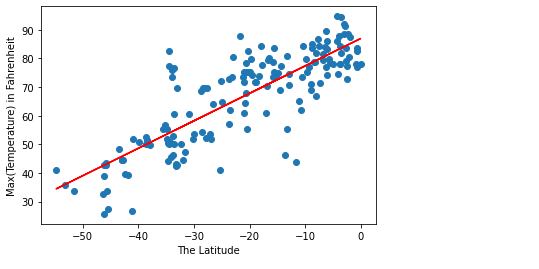

The r-squared is: 0.6837437893510013
 The linear regression is y = 0.96x + 86.93


In [66]:
#Max temperature vs Latitude, the linear regression is provided as print statement for southern hemisphere
weather_dict = {
    "lat": sou_lat,
    "temp": sou_temper
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp

(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Temperature) in Fahrenheit')
plt.savefig("output_img/southern_max_temp_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

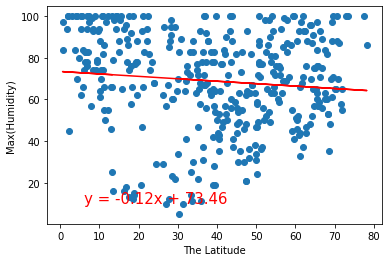

The r-squared is: 0.010435913754569617
 The linear regression is y = -0.12x + 73.46


In [67]:
#Max humidty vs Latitude, the linear regression is provided as print statement in Northen hemisphere
weather_dict = {
    "lat": nor_lat,
    "temp": nor_hum
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Humidity) ')
plt.savefig("output_img/northern_max_humidity_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

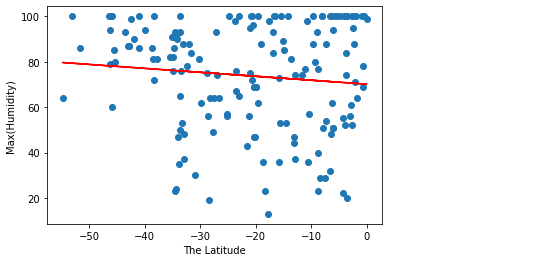

The r-squared is: 0.010951829839413478
 The linear regression is y = -0.17x + 70.09


In [68]:
#Max humidty vs Latitude, the linear regression is provided as print statement in Southern hemisphere
weather_dict = {
    "lat": sou_lat,
    "temp": sou_hum
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Humidity) ')
plt.savefig("output_img/southern_max_humidity_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

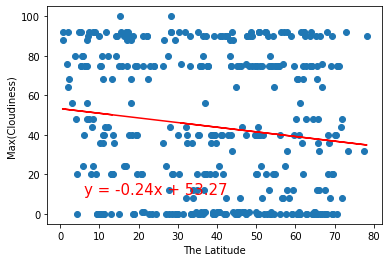

The r-squared is: 0.01830750851938222
 The linear regression is y = -0.24x + 53.27


In [69]:
#Max Cloudiness vs Latitude, the linear regression is provided as print statement in Northen hemisphere
weather_dict = {
    "lat": nor_lat,
    "temp": nor_cloud
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Cloudiness) ')
plt.savefig("output_img/northern_max_cloudiness_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

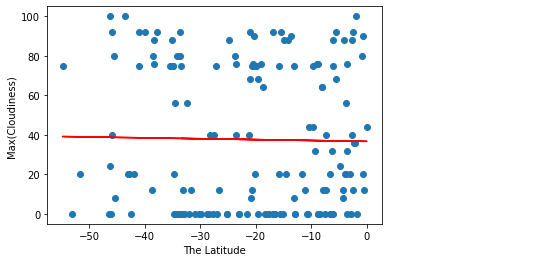

The r-squared is: 0.00030691144403379735
 The linear regression is y = -0.04x + 36.7


In [70]:
#Max Cloudiness vs Latitude, the linear regression is provided as print statement in Southern hemisphere
weather_dict = {
    "lat": sou_lat,
    "temp": sou_cloud
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Cloudiness) ')
plt.savefig("output_img/southern_max_cloudiness_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

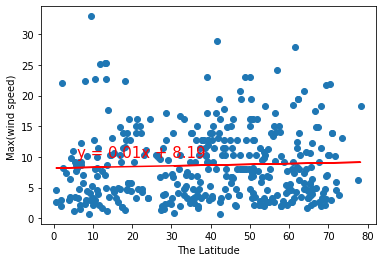

The r-squared is: 0.001791732739314062
 The linear regression is y = 0.01x + 8.19


In [71]:
#Max wind speed vs Latitude, the linear regression is provided as print statement in Northen hemisphere
weather_dict = {
    "lat": nor_lat,
    "temp": nor_speed
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(wind speed) ')
plt.savefig("output_img/northern_max_windspeed_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

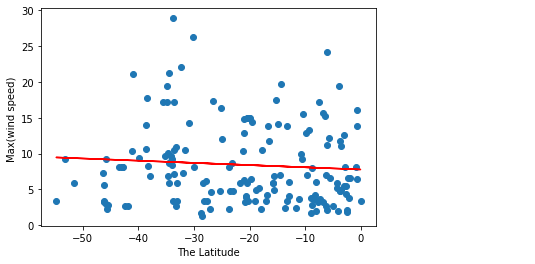

The r-squared is: 0.006046230589075187
 The linear regression is y = -0.03x + 7.77


In [72]:
#Max wind speed vs Latitude, the linear regression is provided as print statement in Southern hemisphere
weather_dict = {
    "lat": sou_lat,
    "temp": sou_speed
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(wind speed) ')
plt.savefig("output_img/southern_max_windspeed_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')